In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import model_selection
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [2]:
#export preprocessing
soal = pd.read_csv(r"C:\Users\DELL\Documents\Active Folder\COOLYAH\SMT 8\TA\source code\Dataset Soal C4-C6 preprocessed.csv")
soal.head()

,Soal Pertanyaan,Label,Casefold,Tokenize,FreqDist,Stopwords,Stemmed
0,ASEAN merupakan organisasi regional Asia Tengg...,C4,asean merupakan organisasi regional asia tengg...,"['asean', 'merupakan', 'organisasi', 'regional...",<FreqDist with 21 samples and 22 outcomes>,"['asean', 'organisasi', 'regional', 'asia', 't...","['asean', 'organisasi', 'regional', 'asia', 't..."
1,Gerakan Non Blok merupakan organisasi negara-n...,C4,gerakan non blok merupakan organisasi negara-n...,"['gerakan', 'non', 'blok', 'merupakan', 'organ...",<FreqDist with 23 samples and 25 outcomes>,"['gerakan', 'non', 'blok', 'organisasi', 'nega...","['gera', 'non', 'blok', 'organisasi', 'negaran..."
2,Salah satu penyebab kacaunya kondisi perekonom...,C4,salah satu penyebab kacaunya kondisi perekonom...,"['salah', 'satu', 'penyebab', 'kacaunya', 'kon...",<FreqDist with 21 samples and 28 outcomes>,"['salah', 'penyebab', 'kacaunya', 'kondisi', '...","['salah', 'sebab', 'kacau', 'kondisi', 'ekonom..."
3,Indonesia harus dapat mengatasi permasalahan e...,C5,indonesia harus dapat mengatasi permasalahan e...,"['indonesia', 'harus', 'dapat', 'mengatasi', '...",<FreqDist with 22 samples and 27 outcomes>,"['indonesia', 'mengatasi', 'permasalahan', 'ek...","['indonesia', 'atas', 'masalah', 'ekonomi', 'h..."
4,Walaupun pada awalnya secara tersembunyi tujua...,C4,walaupun pada awalnya secara tersembunyi tujua...,"['walaupun', 'pada', 'awalnya', 'secara', 'ter...",<FreqDist with 34 samples and 36 outcomes>,"['tersembunyi', 'tujuan', 'pemerintah', 'kolon...","['sembunyi', 'tuju', 'perintah', 'kolonial', '..."


In [3]:
soal['Label'].value_counts()

C4    37
C5    15
C6     6
Name: Label, dtype: int64

In [4]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [5]:
x = soal['Stemmed'].values.astype('U')
y = soal['Label'].values

In [6]:
print(x)

["['asean', 'organisasi', 'regional', 'asia', 'tenggara', 'bentuk', 'dasar', 'deklarasi', 'bangkok', 'tanggal', '8', 'agustus', '1967', 'segi', 'politik', 'organisasi', 'tuju']"
 "['gera', 'non', 'blok', 'organisasi', 'negaranegara', 'kembang', 'bentuk', 'dasar', 'konferensi', 'beograd', '1961', 'organisasi', 'gagas', 'karno', 'tuju']"
 "['salah', 'sebab', 'kacau', 'kondisi', 'ekonomi', 'indonesia', 'merdeka', 'kas', 'negara', 'kosong', 'upaya', 'perintah', 'republik', 'indonesia', 'isi', 'kas', 'negara', 'kosong', 'merdeka']"
 "['indonesia', 'atas', 'masalah', 'ekonomi', 'hadap', 'merdeka', 'salah', 'upaya', 'bangsa', 'indonesia', 'baik', 'ekonomi', 'merdeka']"
 "['sembunyi', 'tuju', 'perintah', 'kolonial', 'keluar', 'bijak', 'politik', 'etis', 'cipta', 'kalang', 'pegawai', 'milik', 'terampil', 'bayar', 'murah', 'bijak', 'dampak', 'positif', 'bangsa', 'indonesia']"
 "['putus', 'hubung', 'dagang', 'eropa', 'timur', 'bangsa', 'bangsa', 'barat', 'berlombalomba', 'cari', 'dunia', 'timur',

In [7]:
LE = LabelEncoder()
y_le = LE.fit_transform(y)

In [8]:
tfidf = TfidfVectorizer()
x_tf = tfidf.fit_transform(x)

print('Feature Names: ', tfidf.get_feature_names())
print('Penilaian dari TF-IDF:', x_tf)
print('Mapping dari Feature Names ke Penilaian:', tfidf.vocabulary_)

x_tf = x_tf.toarray()

Feature Names:  ['12', '14', '1453', '1519', '1520', '1521', '16', '17', '19', '1902', '1912', '1943', '1945', '1961', '1967', '1980', '1998', '20', '2014', '77', 'aa', 'abad', 'agama', 'agustus', 'ahmad', 'akibat', 'aksi', 'aku', 'alam', 'alat', 'aman', 'amerika', 'andil', 'anggap', 'angkasa', 'angkat', 'anjur', 'arab', 'arah', 'asai', 'asas', 'asean', 'asia', 'asing', 'aspek', 'atas', 'autobiografi', 'badan', 'bagi', 'baik', 'bangga', 'bangkit', 'bangkok', 'bangsa', 'banten', 'bantu', 'barat', 'barrameda', 'baur', 'bawa', 'bayar', 'bebas', 'beda', 'belanda', 'bentuk', 'benua', 'beograd', 'berfikir', 'berlombalomba', 'bidang', 'bijak', 'bintang', 'bkr', 'blok', 'bom', 'bpupki', 'buat', 'bubar', 'budaya', 'buddha', 'buka', 'bukittinggi', 'bukti', 'buku', 'bumi', 'bunyi', 'cantum', 'capai', 'cari', 'cina', 'cipta', 'cipto', 'contoh', 'cornelis', 'culi', 'culik', 'daerah', 'daerahdaerah', 'dagang', 'dampak', 'dasar', 'datang', 'de', 'dekat', 'dekker', 'deklarasi', 'deventer', 'dibagibagi

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
print(Counter(y))
print("------------")

#define oversampling strategy
oversample = SMOTE()

#fit and apply the transform
x_over, y_over = oversample.fit_resample(x_tf, y_le)

#summarize class distribution
print("------------")
print(Counter(y_over))

Counter({'C4': 37, 'C5': 15, 'C6': 6})
------------
------------
Counter({0: 37, 1: 37, 2: 37})


In [10]:
print(x_over)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.13178512 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [11]:
print(y_over)

[0 0 0 1 0 0 0 0 0 1 0 2 1 0 0 1 1 1 2 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 1 2 1 0 0 0 0 1 0 0 0 0 0 1 2 1 0 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


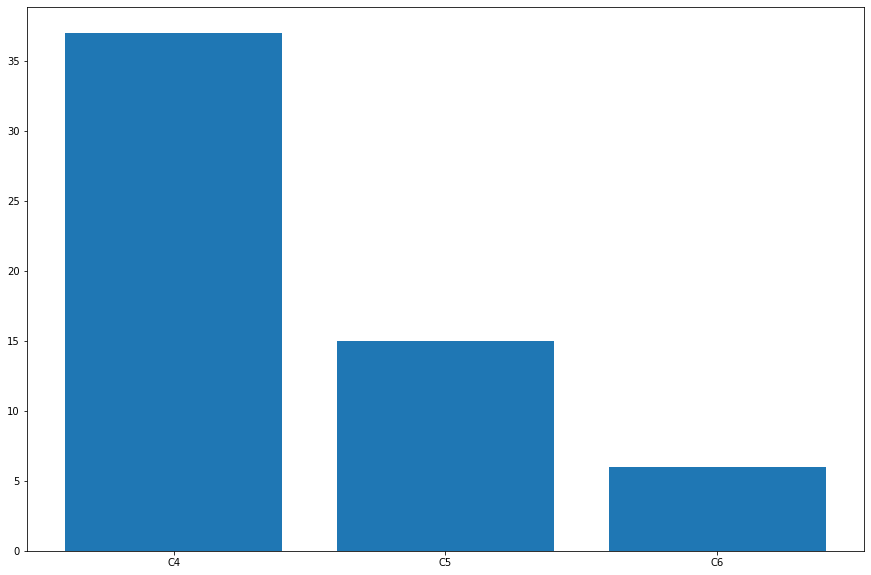

In [12]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns
w = collections.Counter(y)
plt.figure(figsize=(15,10))
plt.bar(w.keys(), w.values())
plt.savefig(r"C:\Users\DELL\Documents\Active Folder\COOLYAH\SMT 8\TA\source code\before-2.png")
plt.show()

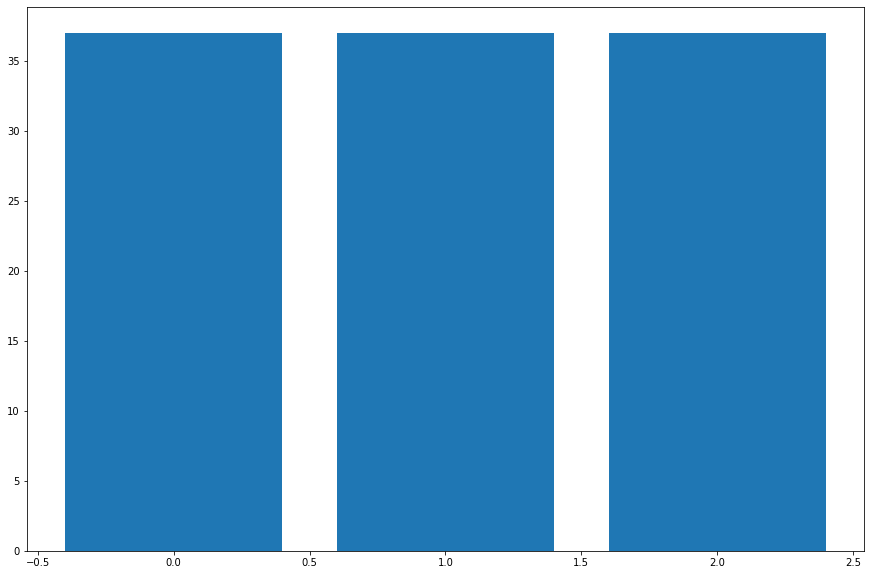

In [13]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns
w = collections.Counter(y_over)
plt.figure(figsize=(15,10))
plt.bar(w.keys(), w.values())
plt.savefig(r"C:\Users\DELL\Documents\Active Folder\COOLYAH\SMT 8\TA\source code\after-2.png")
plt.show()

In [14]:
pipeline_sgd = Pipeline([  
    ('tfidf', TfidfTransformer()),  
    ('classifier', SGDClassifier()),  
])

In [15]:
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
Score_sgd = cross_val_score(pipeline_sgd, x_over, y_over, cv=cv, scoring='accuracy',n_jobs=-1)
Score_sgd 

array([1.        , 1.        , 0.90909091, 0.72727273, 0.90909091,
       0.90909091, 1.        , 1.        , 0.90909091, 0.90909091])

In [16]:
print(np.mean(Score_sgd))

0.9272727272727271


In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
cv = KFold(n_splits=10, random_state=1, shuffle=True)
score_sgd = cross_val_predict(pipeline_sgd, x_over, y_over, cv=cv)
conf_mat = confusion_matrix(y_over, score_sgd)
c_report = classification_report(y_over, score_sgd)
print(conf_mat)
print(c_report)
pd.crosstab(y_over, score_sgd, rownames=['True'], colnames=['Predicted'], margins=True)

[[34  3  0]
 [ 4 33  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        37
           1       0.92      0.89      0.90        37
           2       1.00      1.00      1.00        37

    accuracy                           0.94       111
   macro avg       0.94      0.94      0.94       111
weighted avg       0.94      0.94      0.94       111



Predicted,0,1,2,All
True,,,,
0,34,3,0,37
1,4,33,0,37
2,0,0,37,37
All,38,36,37,111


sebelum balancing

In [18]:
pipeline_sgd_before = Pipeline([
    ('vect', TfidfVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', SGDClassifier()),  
])

In [19]:
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
Score_sgd_before = cross_val_score(pipeline_sgd_before, x, y, cv=cv, scoring='accuracy',n_jobs=-1)
Score_sgd_before

array([0.5       , 0.33333333, 0.83333333, 0.5       , 0.66666667,
       0.66666667, 0.33333333, 0.83333333, 0.6       , 0.8       ])

In [20]:
print(np.mean(Score_sgd_before))

0.6066666666666667


In [21]:
print(Score_sgd.shape, Score_sgd_before.shape)

(10,) (10,)


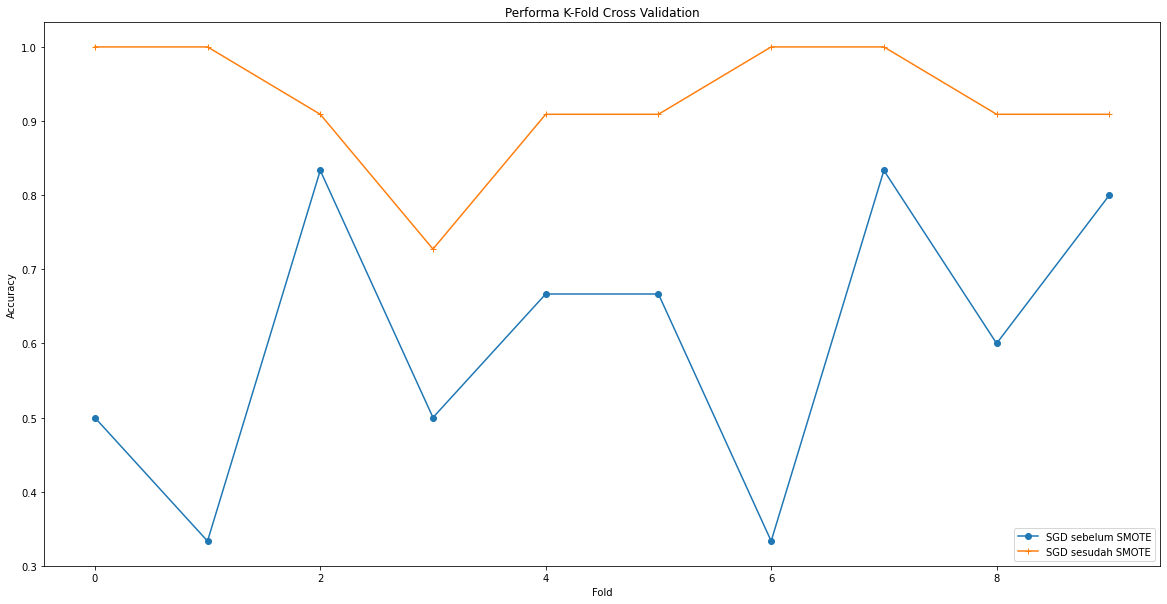

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(Score_sgd_before, marker='o')
plt.plot(Score_sgd, marker='+')
plt.title('Performa K-Fold Cross Validation')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.savefig(r"C:\Users\DELL\Documents\Active Folder\COOLYAH\SMT 8\TA\source code\perbandingan-plot.png")
plt.legend(['SGD sebelum SMOTE', 'SGD sesudah SMOTE'], loc='lower right')
plt.show()

In [23]:
mean_sgd_before = np.mean(Score_sgd_before)
mean_sgd = np.mean(Score_sgd)

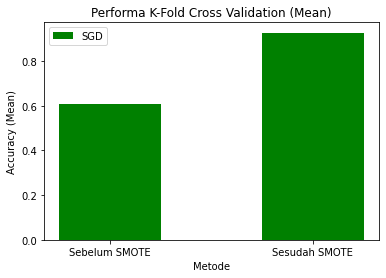

<Figure size 720x720 with 0 Axes>

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 2
sgd = (mean_sgd_before, mean_sgd)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.5

bar = plt.bar(index + bar_width, sgd, bar_width,
color='g',
label='SGD')

plt.xlabel('Metode')
plt.ylabel('Accuracy (Mean)')
plt.title('Performa K-Fold Cross Validation (Mean)')
plt.xticks(index + bar_width, ('Sebelum SMOTE', 'Sesudah SMOTE'))
plt.legend()

plt.figure(figsize=(10,10))
plt.savefig(r"C:\Users\DELL\Documents\Active Folder\COOLYAH\SMT 8\TA\source code\perbandingan-bar.png")
plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
cv = KFold(n_splits=10, random_state=1, shuffle=True)
score_sgd_before = cross_val_predict(pipeline_sgd_before, x, y, cv=cv)
conf_mat = confusion_matrix(y, score_sgd_before)
c_report = classification_report(y, score_sgd_before)
print(conf_mat)
print(c_report)
pd.crosstab(y, score_sgd_before, rownames=['True'], colnames=['Predicted'], margins=True)

[[32  5  0]
 [11  4  0]
 [ 6  0  0]]
              precision    recall  f1-score   support

          C4       0.65      0.86      0.74        37
          C5       0.44      0.27      0.33        15
          C6       0.00      0.00      0.00         6

    accuracy                           0.62        58
   macro avg       0.37      0.38      0.36        58
weighted avg       0.53      0.62      0.56        58



C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Predicted,C4,C5,All
True,,,
C4,32,5,37
C5,11,4,15
C6,6,0,6
All,49,9,58


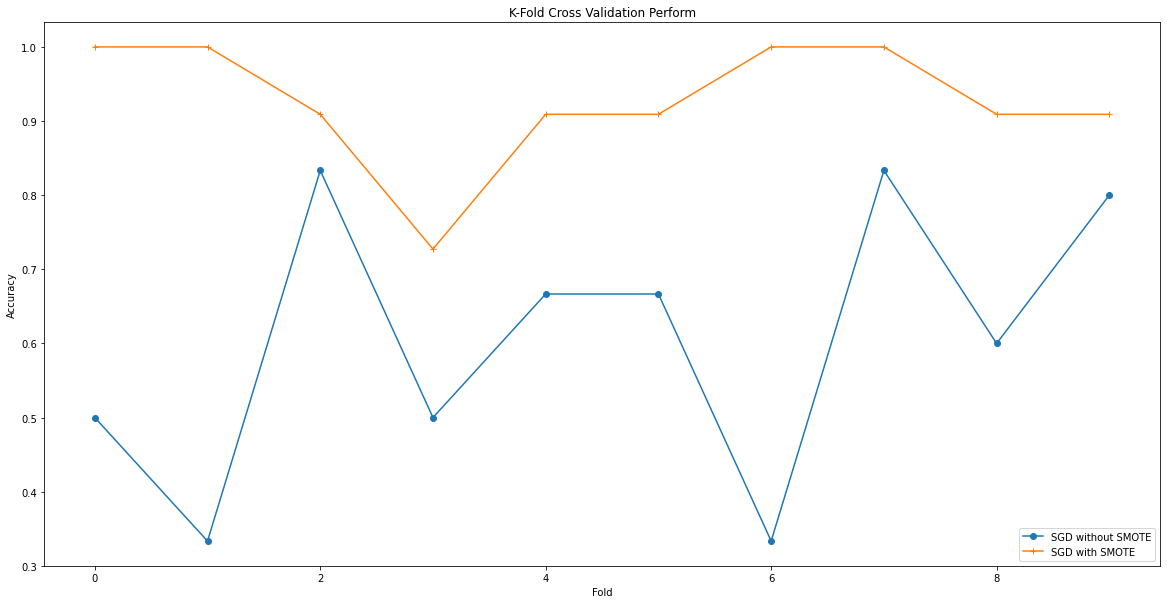

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(Score_sgd_before, marker='o')
plt.plot(Score_sgd, marker='+')
plt.title('K-Fold Cross Validation Perform')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.savefig(r"C:\Users\DELL\Documents\Active Folder\COOLYAH\SMT 8\TA\source code\perbandingan-plot-2.png")
plt.legend(['SGD without SMOTE', 'SGD with SMOTE'], loc='lower right')
plt.show()

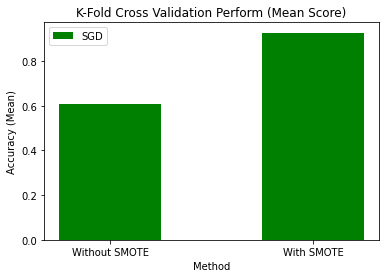

<Figure size 720x720 with 0 Axes>

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 2
sgd = (mean_sgd_before, mean_sgd)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.5

bar1 = plt.bar(index + bar_width, sgd, bar_width,
color='g',
label='SGD')

plt.xlabel('Method')
plt.ylabel('Accuracy (Mean)')
plt.title('K-Fold Cross Validation Perform (Mean Score)')
plt.xticks(index + bar_width, ('Without SMOTE', 'With SMOTE'))
plt.legend()

plt.figure(figsize=(10,10))
plt.savefig(r"C:\Users\DELL\Documents\Active Folder\COOLYAH\SMT 8\TA\source code\perbandingan-bar.png")
plt.tight_layout()
plt.show()